1.1: 0.4245358492648073
1.2: nswdemand, vicdemand


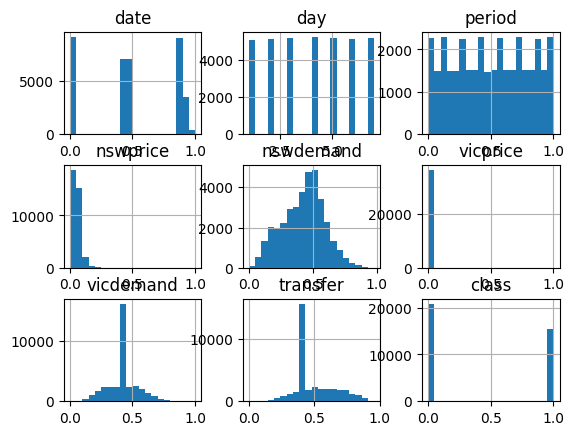

1.4: 1.0


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import  VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

df = pd.read_csv('electricity_train.csv')

print(f'1.1: {df["class"].value_counts()[1]/len(df)}')
c = df.corr()
max_corr = 0
max_corr_x = ''
max_corr_y = ''
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if (i == j): continue

        if (c.loc[df.columns[i]][df.columns[j]] > max_corr):
            max_corr = c.loc[df.columns[i]][df.columns[j]]
            max_corr_x = df.columns[i]
            max_corr_y = df.columns[j]

print(f'1.2: {max_corr_x}, {max_corr_y}')

# 1.3 выберите нужный признак
df.hist(bins=20)
plt.show()



x = df.drop("class", axis=1)
y = df["class"]
#Введите свои значения test_size и random_state
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)


#Random Forest Classifier
rf = RandomForestClassifier(random_state = 21)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_train)
report =classification_report(y_train, y_pred, output_dict=True)
print(f'1.4: {report["accuracy"]}')

In [10]:
#GridSearch вставьте свои параметры
params_grid = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}
grid = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=21),
    params_grid,
    verbose=4,
    cv=3)
grid.fit(x_train,y_train)
print(f'1.5, 1.6, 1.7: {grid.best_params_}')

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   3.8s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.774 total time=   1.3s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.776 total time=   1.6s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.771 total time=   5.7s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.771 total time=   3.6s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.774 total time=   3.5s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.770 total time=   7.9s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.771 total time=   6.1s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.775 total time=   7.2s
[CV 1/3] END max_leaf_nodes=6

In [16]:
y_pred = grid.best_estimator_.predict(x_train)
report =classification_report(y_train, y_pred,digits=3, output_dict=True)
print(f'1.8: {report["accuracy"]}')

y_pred = grid.best_estimator_.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.9: {report["accuracy"]}')

arr=grid.best_estimator_.feature_importances_
arr_max = max(arr)
num = np.where(arr == arr_max)
print(f'1.10: {df.columns[num][0]}')

1.8: 0.7888203041484189
1.9: 0.7844137931034483
1.10: nswprice


In [17]:
#Вводите свои значения параметров
#Voting Classifier
vc = VotingClassifier( estimators=[('lr1', LogisticRegression(solver='liblinear', random_state=21)),
                                        ('svc1', SVC(random_state=21)),('sgdc1',SGDClassifier(random_state=21))],voting='hard') 
vc.fit(x_train,y_train)
y_pred = vc.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.11: {report["accuracy"]}')

#Bagging Classifier
bg=BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, 
    max_features=0.5,
    bootstrap=False,
  random_state=21)
bg.fit(x_train,y_train)
y_pred = bg.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.12: {report["accuracy"]}')

#Gradient Boosting Classifier
gbs = GradientBoostingClassifier(n_estimators=500, learning_rate=0.8, random_state=21, max_depth=2)
gbs.fit(x_train,y_train)
y_pred = gbs.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.13: {report["accuracy"]}')

#AdaBoost Classifier
abc = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=21)
abc.fit(x_train,y_train)
y_pred = abc.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.14: {report["accuracy"]}')

#Stacking Classifier
sc=StackingClassifier(estimators=[('rfc1',RandomForestClassifier(random_state=21)), ('svc1',SVC(random_state=21))],final_estimator=LogisticRegression(random_state=21))
sc.fit(x_train,y_train)
y_pred = sc.predict(x_test)
report =classification_report(y_test, y_pred,digits=3, output_dict=True)
print(f'1.15: {report["accuracy"]}')

1.11: 0.7471724137931034
1.12: 0.8724137931034482
1.13: 0.8951724137931034


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


1.14: 0.8991724137931034
1.15: 0.9055172413793103
